![iSA logo](../iSA_logo.png)
### Statystyka: Zadania domowe
#### Kurs Junior Data Scientist 2020

**Wojciech Artichowicz**

### A. Pytania teoretyczne:

**1. Czym w teorii prawdopodobieństwa są zdarzenia?**

Zdarzeniami losowymi nazywamy dowolne zbiory A,B,...,X,Y,... należące do σ-ciała F utworzonego na przestrzeni zdarzeń elementarnych Omega. Samo σ-ciało F nazywa się zbiorem zdarzeń losowych.

Zdarzenia losowe są zbiorami, więc podlegają wszelkim prawom, zasadom i działaniom określonym dla zbiorów.
Wyróżniamy:
1. Zdarzenia elementarne
2. Przestrzeń zdarzeń elementarnych
3. Zdarzenia sprzyjające danemu zdarzeniu
4. Zdarzenia przeciwne

**2. Podaj podstawowe własności zbioru. Czy w języku Python istnieje obiekt posiadający te własności?**

 - Zbiory są nieuporządkowane. 
 - Elementy zbioru są unikatowe
 Tak, set()

**3. Jeżeli A jest pewnym zdarzeniem, to czym jest zdarzenie przeciwne?**

Zdarzeniem niemożliwym

**4. Czym jest zdarzenie losowe? Czym jest zdarzenie pewne i niemożliwe?**

Zdarzenia losowe są zbiorami, więc podlegają wszelkim prawom, zasadom i działaniom określonym dla zbiorów.
Zdarzenia pewne to zbiór zdarzeń elementarnych w danej przestrzeni zdarzeń elementarnych. Jest ono interpretowane jako zdarzenie które musi zajść.
Zdarzenia niemożliwe są pustym podzbiorem przestrzeni zdarzeń elementarnych i są one interpretowane jako zdarzenia które nie mogą zaistnieć.

**5. Co to jest prawdopodobieństwo?**

Jest to szansa zaistnienia pewnego zdarzenia, która jest określana w matematyce wartością od 0 do 1, gdzie 0 jest szansą zerową, a 1 pewną.

**6. Podaj i objaśnij tw. Bayesa.**

P(A|B) = (P(B|A)*P(A))/P(B)
Twierdzenie Bayesa zakłada prawdopodobieństwo zdarzenia bazując na pewnej wiedzy o zaistniałych czynnikach. 
Na przykład kiedy sprawdzamy pacjenta czy ma nowotwór prostaty mając wiedze o całej populacji dla osoby w tym wieku (czyli posiadamy wiedzę o zaistniałych czynnikach) jesteśmy w stanie wyliczyć jakie jest prawdopodbieństwo że dana osoba (z różnymi objawami) posiada ten nowotwór (dla różnych objawów różne prawdopodbieństwo)

**7. Czym jest zmienna losowa?**

Funkcja przypisująca zdarzeniom elementarnym liczby/wartość

**8. Czym jest rozkład prawdopodobieństwa?**

Miara określona na zbiorze dla pewnej zmiennej losowej przypisująca liczbe/wartość

**9. Czym jest gęstosć rozkładu prawdopodobieństwa?**

Jest to funkcja której wartość dla dowolnej wartości zbioru w dowolnej przykładowej przestrzeni może być interpretowana jako prawdopodobieństwo warunkowe dla danej wartości. Innymi słowy nieujemna funkcja rzeczywista określona dla danego rozkładu prawdopodobieństwa, czyli taka że całka z tej funkcji, policzona w odpowiednich granicach jest równa prawdopodobieństwu wystąpienia danego zdarzenia losowego.

**10. Czym jest dystrybuanta?**

Funkcja która przyporządkowuje każdej liczbie rzeczywistej prawdopobieństwo.
Dana zmienna losowa X przyjmuje wartość mniejszą od x: F(X) = P{X <= x}
Dystrybuanta zmiennej losowej charakteryzuje rozkład prawdopodobieństwa tej zmiennej.

### B. Zadania (Python):

**1. Eksperyment polega na badaniu ankietowym. Ankieta składa się z $N=4$ pytań. Na każde pytanie można udzielić jednej z trzech możliwych odpowiedzi (a, b, c). Omów:**

 - co będzie wynikiem pojedynczego eksperymentu;
 - czym w takim przypadku będzie zdarzenie elementarne;
 - czym będzie przestrzeń zdarzeń elementarnych;
 
**Oblicz liczbę wszystkich możliwych wyników tego eksperymentu. Wygeneruj przestrzeń zdarzeń elementarnych.**

In [1]:
# omega = {N1a, N1b, N1c, N2a, N2b, N2c, N3a, N3b, N3c, N4a, N4b, N4c} # przestrzen zdarzen elementarnych
# zdarzenie elementarne to pojedynczy element ze zbioru powyzej. Zdarzenie elementarne to wybor na konkretnym pytaniu N 1-4 konkretnej odpowiedzi a-c
# wynik eksperymentu to 4 zdarzenia losowe ze zbioru zdarzen elementarnych
# 3^N = 3^4 = 81


**2. Eksperyment polega na rzucie dwiema uczciwymi kostkami. Jeżeli na obu kostkach wypadnie taka sama liczba oczek, zmienna losowa przyjmuje wartość $x_0=0$, jeśli na pierwszej kostce wypadnie liczba oczek mniejsza niż na drugiej, wówczas zmienna losowa przyjmuje wartość $x_1=1$. Natomiast jeśli na pierwszej kostce wypadnie liczba oczek większa niż na drugiej kostce zmienna losowa przyjmuje wartość $x_2=2$.**

**W języku Python utwórz zmienną losową (wartości i odpowiadające im prawdopodbieństwa) reprezentującą ten eksperyment. Oblicz wartość oczekiwaną i odchylenie standardowe oraz momenty zwykłe rzędu pierwszego i drugiego. Utwórz obiekt rozkładu z biblioteki scipy.stats dla tego przypadku**

**Wykonaj wykres rozkładu prawdopodobieństwa i dystrybuanty tej zmiennej losowej.**

In [7]:
import random
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
# 6X6
# 0 6/36 = 1/6 = P(X = Y)
# 1 15/36 = P(Y > X)
# 2 15/36 = P(X > Y)
zdarzenia_elem = [(0, 1/6), (1, 15/36), (2, 15/36)]
x = np.array([0, 1, 2])
y = np.array([1/6, 15/36, 15/36])
zbior = []
def rzuc():
    kostka1 = random.randint(1, 6)
    kostka2 = random.randint(1, 6)
    x = -1
    if kostka1 == kostka2:
        x = 0
    elif kostka1 > kostka2:
        x = 2
    elif kostka2 > kostka1:
        x = 1

    zbior.append(x)

def sim():
    for i in range(50):
        rzuc()
sim()

E_x = 0
for wartosc, p in zdarzenia_elem:
    E_x += wartosc*p

srednia = 0
for i in zbior:
    srednia += i
srednia = srednia / len(zbior)

stdev  = 0
for i in zbior:
    stdev += (i - srednia)**2
stdev = stdev / len(zbior)
print(f"Wartosc oczekiwana: {E_x}")
print(f"Odchylenie standardowe: {stdev}")
print(f"Wartosc i prawdopodobienstwo:")
for z in zdarzenia_elem:
    print(f"Wartosc - P({z[0]}) = {z[1]}")



Wartosc oczekiwana: 1.25
Odchylenie standardowe: 0.5215999999999998
Wartosc i prawdopodobienstwo:
Wartosc - P(0) = 0.16666666666666666
Wartosc - P(1) = 0.4166666666666667
Wartosc - P(2) = 0.4166666666666667


1.25


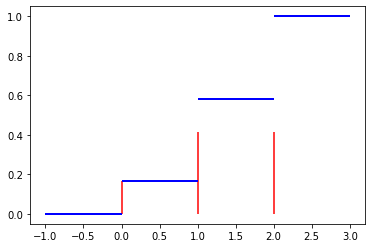

In [11]:
N = np.sum(y)
p = y/N
rozklad = st.rv_discrete(values=(x,p))
print(rozklad.expect())
rozklad.stats()
t = rozklad.xk
y = rozklad.pmf(t)
plt.vlines(t,0,y,"red")


y1 = rozklad.cdf(t)
plt.hlines(np.append([0],y1), np.append([min(t)-1],t), np.append(t,[max(t)+1]), colors='b', lw=2)

**3. Dana jest zmienna losowa o rozkładzie normalnym ze średnią $\mu=1250$ i odchyleniem standardowym $\sigma=300$. Ta zmienna losowa opisuje sumę dziennego przychodu pewnej firmy w PLN. Oblicz:**
 
 1. Prawdopodobieństwo, że w losowo wybranym dniu suma dziennego przychodu osiągnie wartość pomiędzy $1000$ a $1100$ PLN
 2. Prawdopodobieństwo, że w losowo wybranym dniu suma dziennego przychodu osiągnie wartość większą niż $1500$ PLN
 3. Kwotę przychodu dziennego, której prawdopodobieństwo przewyższenia (otrzymania wartości równej lub większej) wynosi $0,1$
 4. Kwotę przychodu dziennego, której prawdopodobieństwo nieosiągnięcia (otrzymania wartości równiej lub niższej) wynosi $0.25$
 
**Wykonaj wykres gęstości rozkładu prawdopodobieństwa i dystrybuanty tej zmiennej losowej. Wykonaj wykresy ilustrujące rozwiązanie dla każdego przypadku**

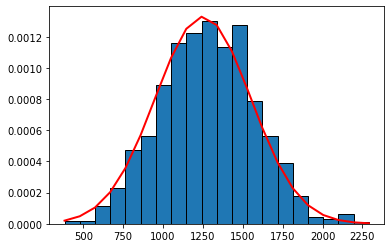

In [17]:
u = 1250
std = 300
s = np.random.normal(u, std, 1000)
count, bins, ignored = plt.hist(s, 20, density=True, edgecolor="black")
plt.plot(bins,  1/(std * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - u)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.show()
kde = st.gaussian_kde(s)

In [18]:
z1 = kde.integrate_box_1d(1000, 1100)
z1

0.10107370956304162

In [47]:
z2 = kde.integrate_box_1d(1500, 3000)
z2


0.23917151512201096

In [44]:
for i in range(2250):
    z = kde.integrate_box_1d(750+i, 3000)
    if z >= 0.0988888 and z <= 0.11:
        print(750+i, z)
# odp. do 1669

1653 0.10984643384574347
1654 0.1092312903211562
1655 0.10861846813878506
1656 0.10800795426126016
1657 0.10739973590871518
1658 0.10679380056301169
1659 0.10619013597170143
1660 0.10558873015172603
1661 0.1049895713928525
1662 0.10439264826084443
1663 0.10379794960036784
1664 0.10320546453763157
1665 0.10261518248276247
1666 0.1020270931319148
1667 0.10144118646911518
1668 0.10085745276784286
1669 0.10027588259234671
1670 0.09969646679869981
1671 0.0991191965355929


In [48]:
for i in range(2250):
    z = kde.integrate_box_1d(750+i, 3000)
    if z >= 0.2488888 and z <= 0.26:
        print(750+i, z)


# odp.  od 1491

1482 0.2590386924733113
1483 0.25791743470362954
1484 0.25679807894606693
1485 0.25568065515084837
1486 0.25456519330803784
1487 0.2534517234352521
1488 0.2523402755652847
1489 0.2512308797336493
1490 0.25012356596605123
1491 0.2490183642657973
